In [37]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import soundfile as sf
import pickle
import noisereduce as nr
import torch
# load audio file
# reduce noise



import os
import numpy as np
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import signal

sr = 16000
i=-1

parkinson_path = 'audio/italian/parkinson'
healthy_path = 'audio/italian/healthy_control'
parkinson_npy_path = 'audio/italian/npy/parkinson'
healthy_npy_path = 'audio/italian/npy/healthy_control'
labels_npy_path =  'audio/italian/npy/labels'
data_npy_path = 'audio/italian/npy/audio_list'

def load_audio_data(folder,i):
    audio_list = []
    for root, dirs, files in os.walk(folder):
        i+=1
        for file in files:
            if file.endswith('.wav'):
                person_index.append(i)
                file_path = os.path.join(root, file)
                print(root,i)
                audio_data , sample_rate = librosa.load(file_path, sr=16000)
                max_samples =  120 * sample_rate  
                audio_data = audio_data[:max_samples] if audio_data.shape[0] > max_samples else audio_data
                audio_list.append(audio_data)
    return audio_list,i

person_index =[]
healthy_list, num_healthy = load_audio_data(healthy_path,i)
healthy_label = [0 for _ in range(num_healthy)]
parkinson_list, num_all  = load_audio_data(parkinson_path,num_healthy-1)
print(num_all)
parkinson_label = [1 for _ in range(num_all-num_healthy)]
healthy_random_data = random.choice(healthy_list)
parkinson_random_data = random.choice(parkinson_list)
healthy_size = len(healthy_list)
parkinson_size = len(parkinson_list)
print()
print(num_all)
time_healthy = np.arange(0, len(healthy_random_data)) / sr
time_parkinson = np.arange(0, len(parkinson_random_data)) / sr
def fft(audio_data,sr):
    fft_result = np.fft.fft(audio_data)
    fft_magnitude = np.abs(fft_result)
    frequencies = np.fft.fftfreq(len(fft_result), 1/sr)
    return frequencies,fft_magnitude
frequencies_healthy, magnitude_healthy = fft(healthy_random_data,16000)
frequencies_parkinson, magnitude_parkinson = fft(parkinson_random_data,16000)

audio/italian/healthy_control\AGNESE P 1
audio/italian/healthy_control\AGNESE P 1
audio/italian/healthy_control\Alessandro P 2
audio/italian/healthy_control\Alessandro P 2
audio/italian/healthy_control\Alessandro P 2
audio/italian/healthy_control\ANGELA C 3
audio/italian/healthy_control\ANGELA C 3
audio/italian/healthy_control\ANGELA G 4
audio/italian/healthy_control\ANGELA G 4
audio/italian/healthy_control\ANTONIETTA P 5
audio/italian/healthy_control\ANTONIETTA P 5
audio/italian/healthy_control\ANTONIO C 6
audio/italian/healthy_control\ANTONIO C 6
audio/italian/healthy_control\BRIGIDA C 7
audio/italian/healthy_control\BRIGIDA C 7
audio/italian/healthy_control\GILDA C 8
audio/italian/healthy_control\GILDA C 8
audio/italian/healthy_control\GIOVANNA G 9
audio/italian/healthy_control\GIOVANNA G 9
audio/italian/healthy_control\GIOVANNI B 10
audio/italian/healthy_control\GIOVANNI B 10
audio/italian/healthy_control\GRAZIA G 11
audio/italian/healthy_control\GRAZIA G 11
audio/italian/healthy_c

<Figure size 640x480 with 0 Axes>

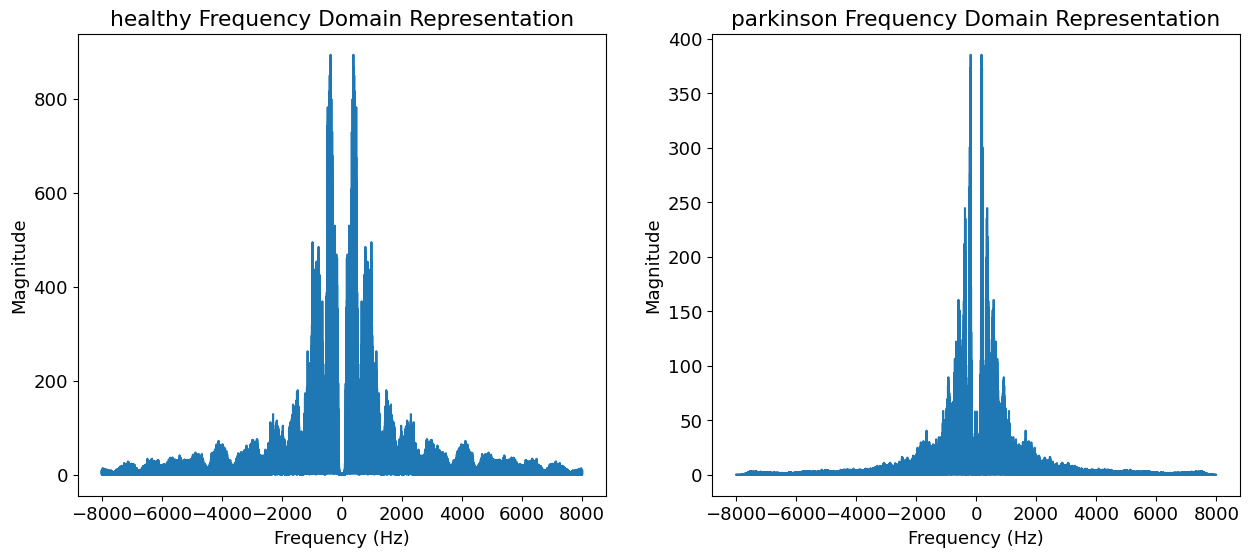

In [38]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 13})

plt.subplots_adjust(hspace=15)

plt.figure(figsize=(15, 6))



plt.subplot(1,2,1)
plt.plot(frequencies_healthy, magnitude_healthy)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("healthy Frequency Domain Representation")

plt.subplot(1,2,2)
plt.plot(frequencies_parkinson, magnitude_parkinson)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("parkinson Frequency Domain Representation")
plt.show()

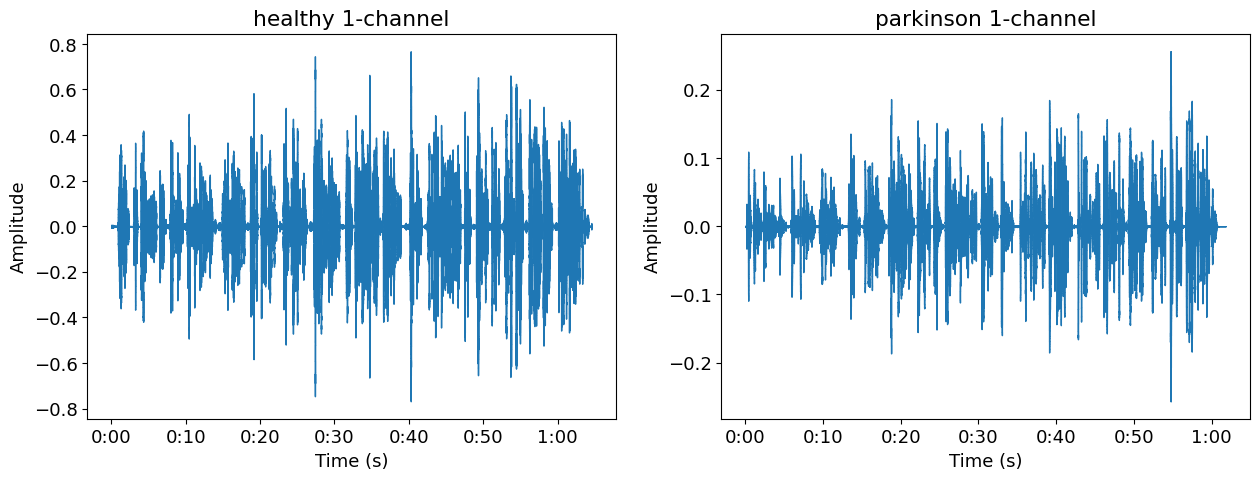

In [39]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=15)
plt.subplot(1,2,1)
librosa.display.waveshow(healthy_random_data, sr=16000)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("healthy 1-channel")




plt.subplot(1,2,2)
librosa.display.waveshow(parkinson_random_data, sr=16000)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("parkinson 1-channel")
plt.show()


In [40]:
print("Healthy Audios :", len(healthy_list) )
print("Parkinson Audios :", len(parkinson_list))

Healthy Audios : 45
Parkinson Audios : 52


In [41]:

labels = healthy_label + parkinson_label
print(len(labels))
audio_list = healthy_list + parkinson_list

50


In [42]:
persons = {}
for d, l in zip(audio_list, person_index):
    if l not in persons:
        persons[l] = []
    persons[l].append(d)


In [43]:

# Open the file in write-binary mode and write the audio_list to the file
with open(data_npy_path, 'wb') as f:
    pickle.dump(persons, f)

# Open the file in write-binary mode and write the labels to the file
with open(labels_npy_path, 'wb') as f:
    pickle.dump(labels, f)